In [1]:
from scipy.interpolate import interp1d
from scipy.special import hyp2f1, beta, gamma, gammaln
from numpy.random import uniform
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
def rpdf(n, rs):
    """ n = number of samples, rs = correlation coefficients for which you want to get the density """
    num = (1-rs**2)**((n-4)/2)
    den = 1/beta(.5, (n-2)/2)
    out = np.multiply(num, den)
    return out

def rpdf_gen(rho, n, rs):
    """ rho = population correlation coefficient. If rho = 0, then this function simplifies to the above function """
    lnum = np.log(n-2) + gammaln(n-1) + np.log((1-rho**2)**(.5*(n-1))) + np.log((1-rs**2)**(.5*(n-4)))
    lden = np.log(np.sqrt(2*np.pi)) + gammaln(n-.5) + np.log((1-rho*rs)**(n-3/2))
    fac = lnum - lden
    hyp = hyp2f1(.5, .5, (2*n-1)/2, (rho*rs+1)/2)
    return np.exp(fac) * hyp

/home/lukas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


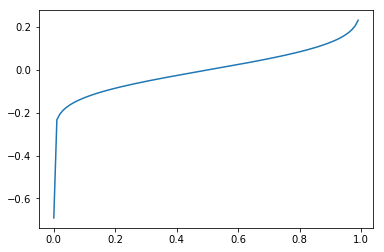

0.099766923442736521

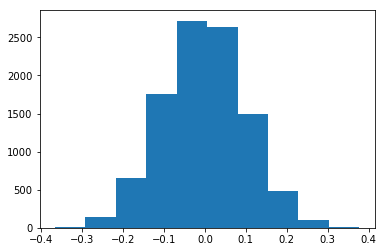

In [3]:
# To sample from a PDF, use the inverted CDF 
# (aka quantile function: a function which tells you, for every percentile you z, 
# at which x the z percent of the data is left x in the distribution)
# Then, generate uniform randomly distributed numbers, and use the inverted CDF on those numbers.

xs = uniform(0, 1, 10000)
rs = np.arange(-1, 1, .001)
ys = rpdf_gen(0, 100, rs)
cdf = ECDF(ys)
inverted_edf = interp1d(np.cumsum(ys[ys>0])/np.sum(ys[ys>0]), rs[ys>0], bounds_error=False)

# This is what the inverted ECDF looks like
x = np.arange(-1, 1, .01)
y = inverted_edf(x)
plt.plot(x, y)
plt.show()

# Now, we can sample 10000 values from the inverted EDCF using a uniform dist
samples = np.random.uniform(0, 1, 10000)
samples_transformed = inverted_edf(samples)
plt.hist(samples_transformed)
np.std(samples_transformed)  # 0.1 for rho=0, decreases with higher rhos

#### plots

/Users/steven/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log


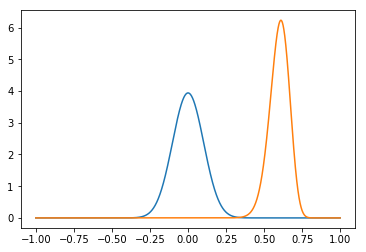

In [51]:
rs = np.arange(-1, 1, .001)
ys = rpdf(100, rs)
plt.plot(rs, ys)

ys = rpdf_gen(.6, 100, rs)
plt.plot(rs, ys)